In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# Data Explorating

In [3]:
path = '..\\Adv_sales Pred\\Advertising.csv'
dataset = pd.read_csv(path)
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Analysis

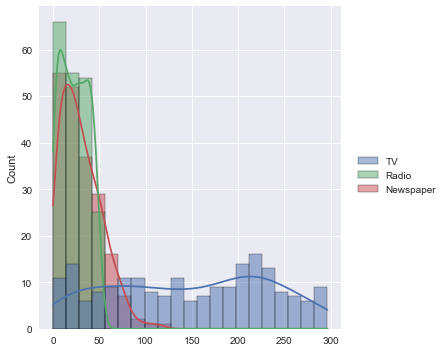

In [6]:
dataset1 = dataset.iloc[:,:3]
sns.displot(data = dataset1, kde=True);

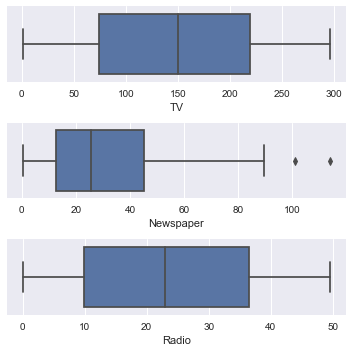

In [7]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['TV'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio'], ax = axs[2])
plt.tight_layout()

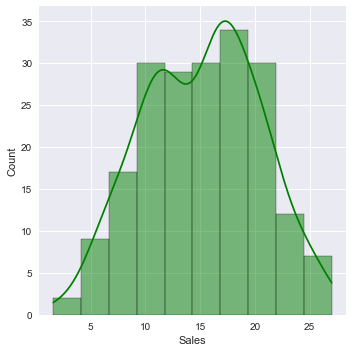

In [8]:
dataset1 = dataset.iloc[:,3]
sns.displot(data = dataset1, kde=True, color = 'green',legend=True);

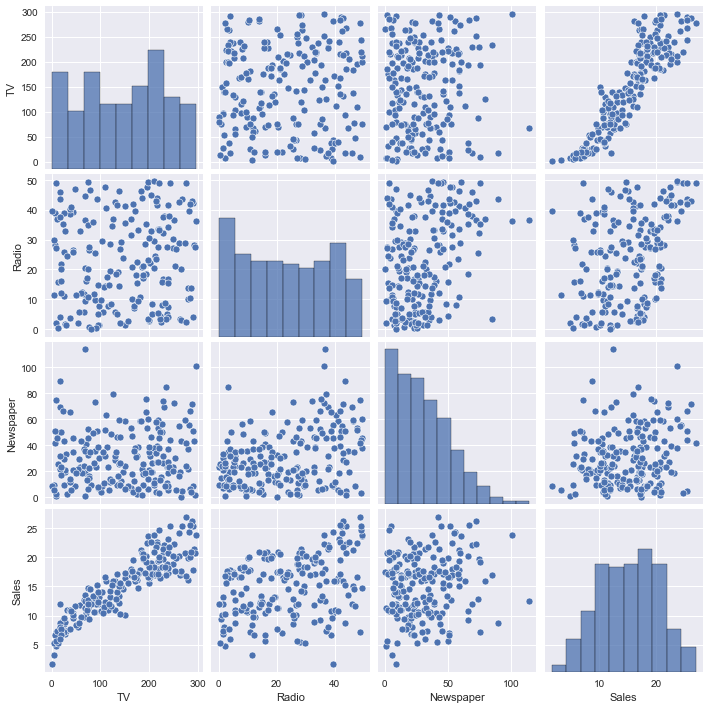

In [9]:
sns.pairplot(data=dataset);

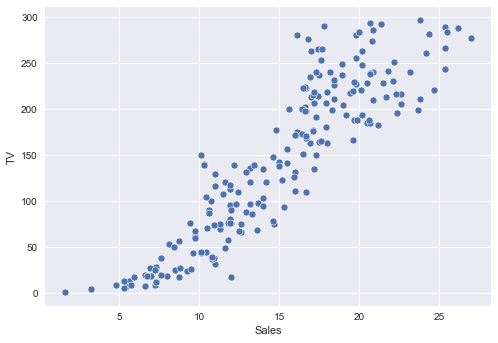

In [10]:
sns.scatterplot(data=dataset,y='TV',x='Sales');

## The variable 'TV' seems to be most correlated with 'Sales'. So, Let's perform SIMPLE LINEAR REGRESSION using 'TV' as our feature variable.

# Training, Building model

## ***Problem Statement***

Build a model which predicts sales based on the money spent on different platforms for marketing.

## ***Performing Linear Regression***

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>
---

##  **Simple Linear Regression**

### Data
Use the advertising dataset analyse the relationship between `TV advertising` and `Sales` using a simple linear regression model. 

We'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

In case:

$Sales = c + m_1 \times TV$  

The $m$ values are called the model **coefficients** or **model parameters**

## Splitting the dataset into the Training set and Test set

In [11]:
X = dataset.iloc[:,0].values # TV columns
y = dataset.iloc[:,3].values

X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ( f' Percent of train data {len(X_train)/len(X)*100}%')

 Percent of train data 75.0%


## Training the Simple Linear Regression model on the Training set

In [12]:
from sklearn.linear_model import LinearRegression

#To Create Simple Linear Regression Model
model_SimpLR = LinearRegression()
model_SimpLR.fit(X_train, y_train)

LinearRegression()

## Visualising the Training set results

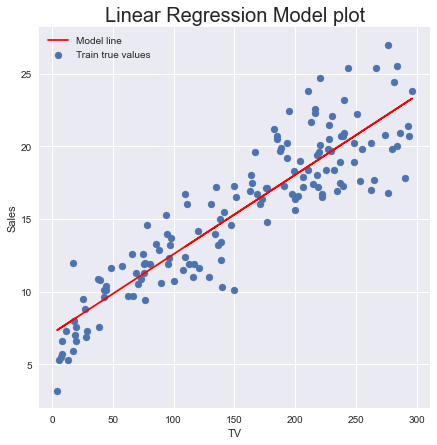

In [13]:
plt.figure(figsize = (7,7))
plt.scatter(X_train[:,:1], y_train)
# Plot the line
plt.plot(X_train, model_SimpLR.predict(X_train),color = 'red')
plt.legend(['Model line','Train true values'])
plt.title('Linear Regression Model plot',size = 20)
plt.xlabel('TV')
plt.ylabel('Sales');

In [14]:
print(f"c : {model_SimpLR.intercept_}")
print(f"m1 : {float (model_SimpLR.coef_)}")

c : 7.128878060785404
m1 : 0.05452888244949519


The final linear regression equation:
$Sales = c + m_1 \times TV$ <=> $Sales = 7.129 + 0.055\times TV$

## SAVE MODEL

In [15]:
import joblib
joblib.dump(model_SimpLR,'Model Sales_simple_predict.sav')

['Model Sales_simple_predict.sav']

## **Multiple Linear Regression**

### Data
Use the advertising dataset analyse the relationship between `TV advertising`, `Radio advertising`, `Newspaper advertising` and `Sales` using a multiple linear regression model. 

We'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

In case:

$Sales = c +  m_1 \times TV + m_2 \times Radio + m_3 \times Newspaper$  


## Splitting the dataset into the Training set and Test set

In [16]:
X = dataset.iloc[:,:3].values
y = dataset.iloc[:,3].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ( f' Percent of train data {len(X_train)/len(X)*100}%')

 Percent of train data 75.0%


## Training the Multiple Linear Regression model on the Training set

In [17]:
from sklearn.linear_model import LinearRegression
model_MulLR = LinearRegression()
model_MulLR.fit(X_train, y_train)

LinearRegression()

## Visualising the Training set results

In [18]:
a, b = np.meshgrid(X_train[:,0],  X_train[:,1])
c = model_MulLR.predict(X_train)
c = np.array(c)
c = np.expand_dims(c,axis=0)

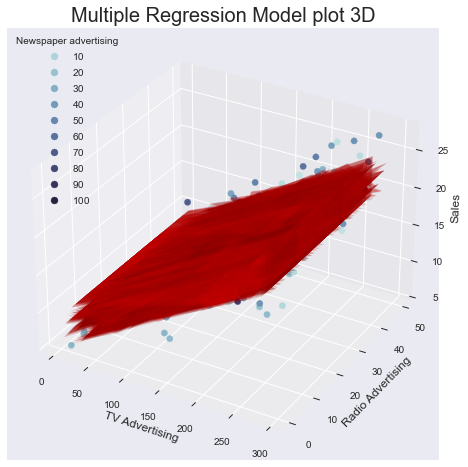

In [19]:
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(6,6))
ax = mplot3d.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette("ch:start=.2,rot=-.3", 150).as_hex())
sc = ax.scatter3D(X_train[:,0], X_train[:,1], y_train, s=40, alpha=1, c = X_train[:,2], cmap = cmap)
ax.plot_surface(a, b, c, alpha=0.1,linewidth=0, antialiased=True,color = 'red')
ax.set_zlim(5,)
ax.set_title('Multiple Regression Model plot 3D',size = 20)
ax.set_xlabel('TV Advertising',fontsize = 12)
ax.set_ylabel('Radio Advertising',fontsize = 12)
ax.set_zlabel('Sales',fontsize = 12)
plt.legend(*sc.legend_elements(), title = "Newspaper advertising");

In [20]:
print(f"c : {model_MulLR.intercept_}")
print(f"m1 : {model_MulLR.coef_[0]}")
print(f"m2 : {model_MulLR.coef_[1]}")
print(f"m3 : {model_MulLR.coef_[2]}")

c : 4.728630893324766
m1 : 0.053453080578711995
m2 : 0.11041756333934201
m3 : -4.371251349993832e-05


The final linear regression equation:
$Sales = 4.73 +  0.05 \times TV + 0.11 \times Radio - 4.37 \times Newspaper$  

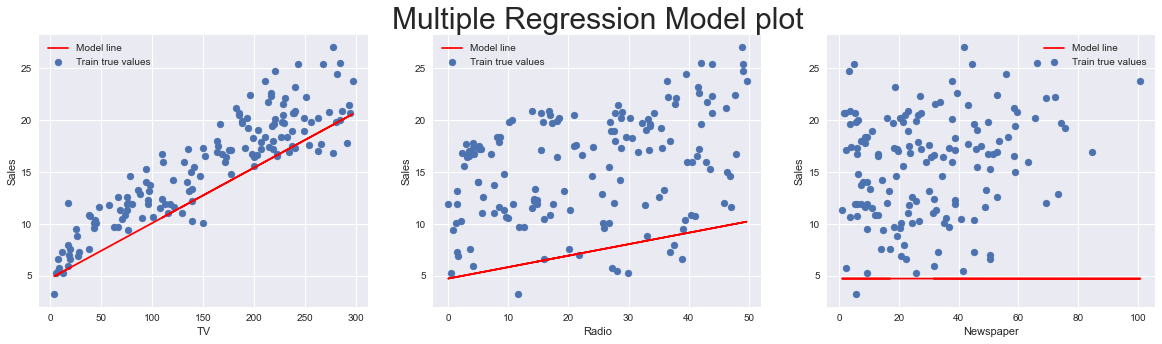

In [21]:
fig,((ax1,ax2,ax3)) = plt.subplots(figsize=(20,5),nrows=1,ncols=3)
ax2.set_title('Multiple Regression Model plot',size = 30)

ax1.scatter(X_train[:,0], y_train)
ax1.plot(X_train[:,0], (model_MulLR.intercept_ + model_MulLR.coef_[0] * X_train[:,0]) ,color = 'red')
ax1.legend(['Model line','Train true values'])
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')

ax2.scatter(X_train[:,1], y_train)
ax2.plot(X_train[:,1], (model_MulLR.intercept_ + model_MulLR.coef_[1] * X_train[:,1]) ,color = 'red')
ax2.legend(['Model line','Train true values'])
ax2.set_xlabel('Radio')
ax2.set_ylabel('Sales')

ax3.scatter(X_train[:,2], y_train)
ax3.plot(X_train[:,2], (model_MulLR.intercept_ + model_MulLR.coef_[2] * X_train[:,2]) ,color = 'red')
ax3.legend(['Model line','Train true values'])
ax3.set_xlabel('Newspaper')
ax3.set_ylabel('Sales');

## SAVE MODEL

In [22]:
joblib.dump(model_MulLR,'Model Sales_multiple_predict.sav')

['Model Sales_multiple_predict.sav']